In [15]:
import polars as pl
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

In [16]:
df = pl.read_csv("https://raw.githubusercontent.com/uribo/cue2022aw_r104/main/data-raw/shikoku_kome_sisyutu2019to2021/20221121T014749Z-f75ff/shikoku_kome_sisyutu2019to2021.csv")


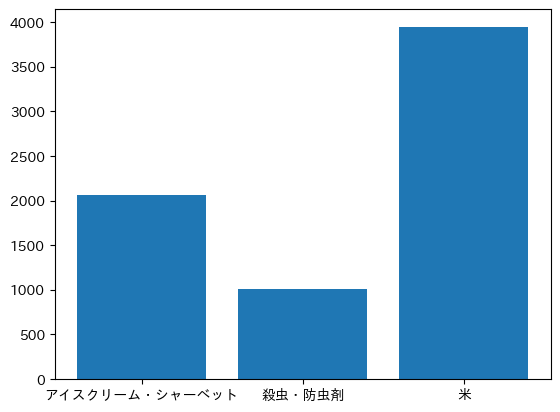

In [17]:
plt.bar(df['品目分類'], df['value'])
plt.show()

In [18]:
df2 = df.filter((pl.col("項目") == "支出金額_複数単位") & (pl.col("市区町村コード") == 36201))
df2 = df2.select("品目分類", "value")
df2.head(4)


品目分類,value
str,i64
"""アイスクリーム・シャーベット…",367
"""殺虫・防虫剤""",7
"""米""",1138
"""アイスクリーム・シャーベット…",244


In [19]:
df2 = (
  df
  .filter((df["項目"] == "支出金額_複数単位") & (df["市区町村コード"] == 36201))
  .select("ym", "品目分類", "value")
)
df2.head(4)

ym,品目分類,value
i64,str,i64
201901,"""アイスクリーム・シャーベット…",367
201901,"""殺虫・防虫剤""",7
201901,"""米""",1138
201902,"""アイスクリーム・シャーベット…",244


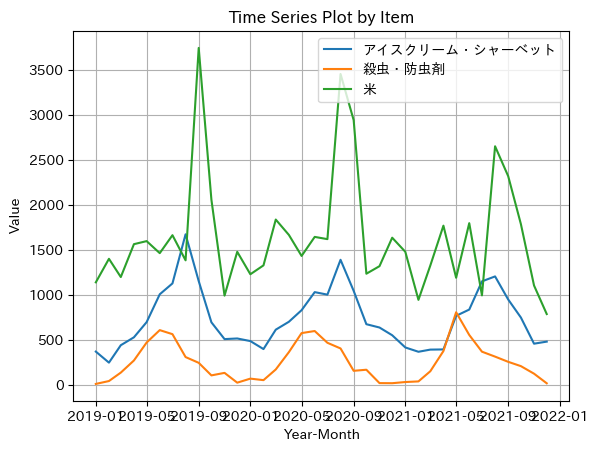

In [20]:
# pandasデータフレームに変換
df_pnd = df2.to_pandas()
# 年月の表現を変換 (i64クラスの年月をdatetime形式に変換)
df_pnd['ym'] = pd.to_datetime(df_pnd['ym'], format='%Y%m')

# 品目ごとにデータフレームをグループ化
grouped = df_pnd.groupby("品目分類")

# グループごとにプロット
for item, group in grouped:
    plt.plot(group["ym"], group["value"], label=item)

plt.xlabel("年月")
plt.ylabel("金額")
plt.title("徳島市における品目分類別の支出金額の推移")
plt.legend()
plt.grid(True)
plt.show()

棒グラフの塗り分け

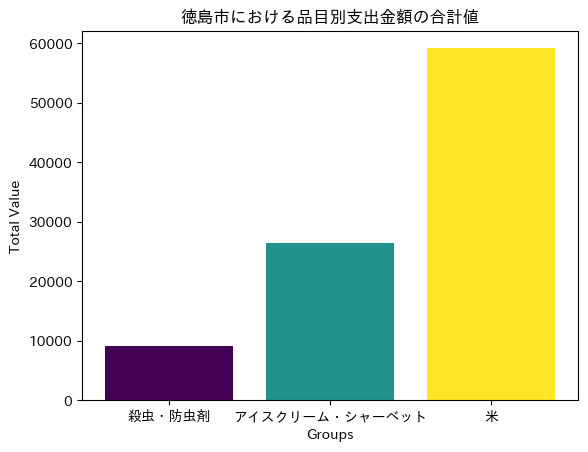

In [21]:
# グループごとに値を集計
grouped_df = df2.groupby("品目分類").agg(
    total_value=pl.col("value").sum()
)
# グループ名と集計された値を取得
groups, aggregated_values = grouped_df.get_columns()

# カラーマップを作成
colors = plt.cm.viridis(np.linspace(0, 1, len(groups)))

# 棒グラフを描画し、グループごとに塗り分け
plt.bar(groups, aggregated_values, color=colors)

plt.xlabel('Groups')
plt.ylabel('Total Value')
plt.title('徳島市における品目別支出金額の合計値')
plt.show()